In [1]:
import numpy as np
from netCDF4 import Dataset # conda install -c anaconda netcdf4
import pandas as pd

In [2]:
f = Dataset('DataAnginSalbi.nc')
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2019-10-24 15:12:03 GMT by grib_to_netcdf-2.13.0: grib_to_netcdf /data/data01/scratch/d5/92/_mars-atls17-70e05f9f8ba4e9d19932f1c45a7be8d8-30fcNw.grib -o /data/data04/scratch/92/64/_grib2netcdf-atls19-a562cefde8a29a7288fa0b8b7f9413f7-9Cy7Y0.nc -utime
    dimensions(sizes): longitude(1), latitude(1), time(124)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time,latitude,longitude), int16 v10(time,latitude,longitude)
    groups: 

In [3]:
f.variables.keys()

dict_keys(['longitude', 'latitude', 'time', 'u10', 'v10'])

In [4]:
time = f.variables['time'][:]
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
u10 = f.variables['u10'][:]
v10 = f.variables['v10'][:]

In [5]:
print ('shape time',np.shape(time))
print ('shape lats',np.shape(lats))
print ('shape v10',np.shape(v10))

shape time (124,)
shape lats (1,)
shape v10 (124, 1, 1)


In [6]:
df = pd.DataFrame(u10[:,0,0],columns=['u10'])
df['v10']=v10[:,0,0]
display(df.head())

,u10,v10
0,5.468624,1.103509
1,4.834966,1.625544
2,4.958826,0.215388
3,4.764334,1.121739
4,4.645696,1.684376


In [7]:
# Menghitung nilai statistik
df[['u10','v10']].describe()

,u10,v10
count,124.000000,124.000000
mean,5.783011,1.103428
std,1.776645,2.546855
min,1.266091,-4.288693
25%,4.649285,-0.971081
50%,5.712138,0.995539
75%,6.879162,3.047923
max,10.770667,6.571780


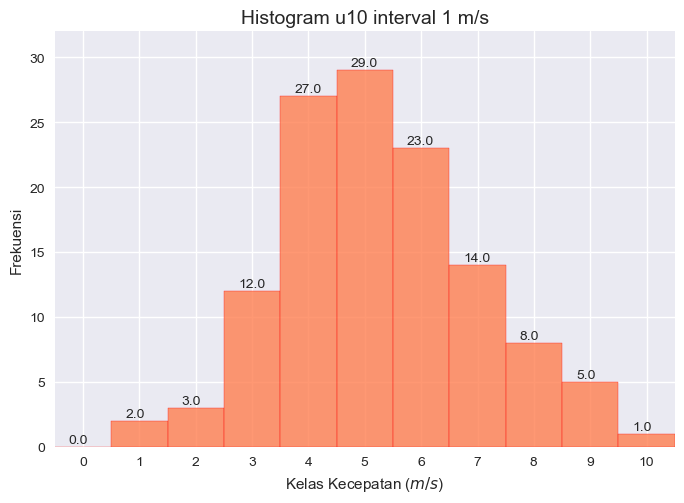

In [8]:
import matplotlib.pyplot as plt

xu = np.arange(0,12,1)
xt = np.arange(0.5,12.5,1)
hist,bin = np.histogram(u10[:,0,0],bins=xu)

plt.style.use('seaborn')
fig, ax = plt.subplots(dpi=100)
ax.hist(df['u10'],bins=xu,color='coral',edgecolor='red',alpha=.8)
ax.set_title('Histogram u10 interval 1 m/s', fontsize=14)
ax.set_xlabel('Kelas Kecepatan ($m/s$)')
ax.set_ylabel('Frekuensi')
plt.xticks(xt,xu)
ax.set(xlim=(0,11),ylim=(0,32))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+.25, p.get_height()+ .3))
    
plt.show()

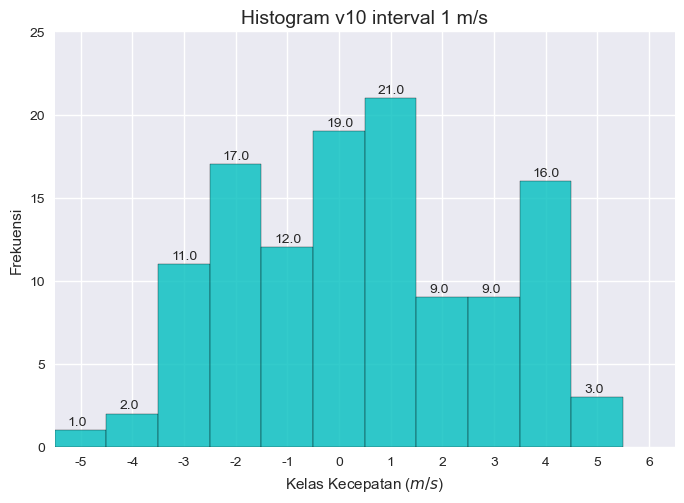

In [9]:
xv = np.arange(-5,7,1)
xx = np.arange(-4.5,7.5,1)

fig, ax = plt.subplots(dpi=100)
ax.hist(df['v10'],bins=xv,color='c',edgecolor='k',alpha=.8)
ax.set_title('Histogram v10 interval 1 m/s', fontsize=14)
ax.set_xlabel('Kelas Kecepatan ($m/s$)')
ax.set_ylabel('Frekuensi')
plt.xticks(xx,xv)
ax.set(xlim=(-5,7),ylim=(0,25))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+.25, p.get_height()+ .3))
    
plt.show()

# Tambahan


In [10]:
import math 

df = pd.DataFrame(u10[:,0,0],columns=['u10'])
df['v10']=v10[:,0,0]
# display (df)

In [11]:
dir = []
for i in range(len(df)) :
    temp=180+(180/math.pi)*math.atan2(df['u10'].iloc[i],df['v10'].iloc[i])
    dir.append(temp)
df['dir']=dir[:]

mag=[]
for i in range(len(df)) :
    temp=math.hypot(df['u10'].iloc[i],df['v10'].iloc[i])
    mag.append(temp)
df['mag']=mag[:]

display(df)

# plt.plot(df['mag'])

,u10,v10,dir,mag
0,5.468624,1.103509,258.591529,5.578851
1,4.834966,1.625544,251.417054,5.100911
2,4.958826,0.215388,267.512908,4.963502
3,4.764334,1.121739,256.751283,4.894607
4,4.645696,1.684376,250.071021,4.941621
...,...,...,...,...
119,9.256792,-0.062036,270.383974,9.257000
120,7.750749,-1.841097,283.362276,7.966414
121,7.365826,0.622078,265.172566,7.392048
122,9.582541,-1.228245,277.304078,9.660935


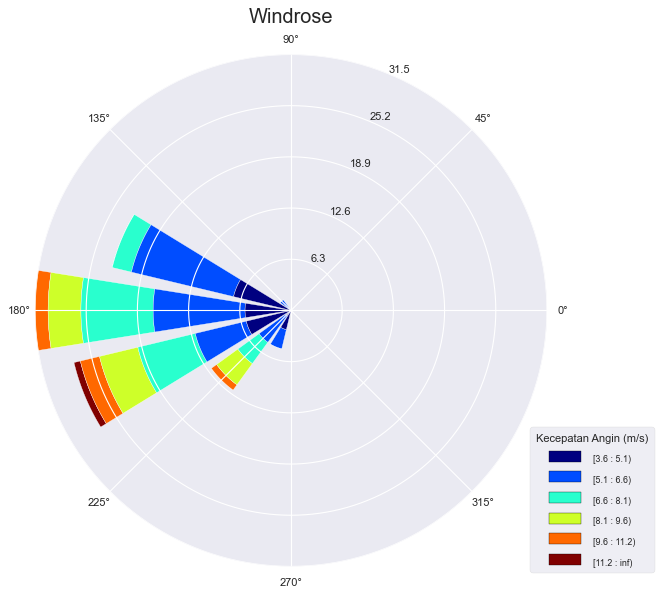

In [13]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['dir'], df['mag'], normed=True, opening=.8, edgecolor='white',blowto=False)
ax.set_legend(bbox_to_anchor=(.97,-.01), prop={'size': 14},frameon=True,title='Kecepatan Angin (m/s)')
ax.set_title('Windrose',fontsize=18)

plt.show()